In [319]:
from sklearn import datasets
import numpy as np
import pandas as pd
iris=datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [320]:
A0 = iris.data # np.array

print("Dimensions:")
print(A0.shape)

print("---")
print("First 5 samples:")
print(A0[:5,:])

print("---")
print("Feature names:")
print(iris.feature_names)

Dimensions:
(150, 4)
---
First 5 samples:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
---
Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [321]:
## Organic code for PCA

# 1. Normalize columns of $A$ so that each feature has zero mean
mu = np.mean(A0,axis=0)
A = A0 - mu
print("Does A have zero mean across rows?")
print(np.mean(A,axis=0))

# 2. Compute sample covariance matrix $\Sigma = {A^TA}/{(m-1)}$
m,n = A.shape
Sigma = (A.T @ A)/(m-1)
print("---")
print("Sigma:")
print(Sigma)

# 3. Perform eigen-decomposition of $\Sigma$ using `np.linalg.eig(Sigma)`
l,X = np.linalg.eig(Sigma)
print("---")
print("Evalues:")
print(l)
print("---")
print("Evectors:")
print(X)

# 4. Compress by ordering $k$ evectors according to largest evalues and compute $AX_k$
print("---")
print("Compressed - 4D to 3D:")
Acomp = A @ X[:,:3] # first 3 evectors
print(Acomp[:5,:]) # first 5 observations

# 5. Reconstruct from compressed version by computing $A X_k X_k^T$
print("---")
print("Reconstructed version - 3D to 4D:")
Arec = A @ X[:,:3] @ X[:,:3].T # first 3 evectors
print(Arec[:5,:]+mu) # first 5 obs, adding mu to compare to original

Does A have zero mean across rows?
[ -1.12502600e-15  -6.75015599e-16  -3.23889064e-15  -6.06921920e-16]
---
Sigma:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
---
Evalues:
[ 4.22484077  0.24224357  0.07852391  0.02368303]
---
Evectors:
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
---
Compressed - 4D to 3D:
[[-2.68420713 -0.32660731 -0.02151184]
 [-2.71539062  0.16955685 -0.20352143]
 [-2.88981954  0.13734561  0.02470924]
 [-2.7464372   0.31112432  0.03767198]
 [-2.72859298 -0.33392456  0.0962297 ]]
---
Reconstructed version - 3D to 4D:
[[ 5.09968079  3.50032609  1.40048267  0.19924425]
 [ 4.86840068  3.03228058  1.44778117  0.12518657]
 [ 4.69387555  3.20625649  1.30926

In [322]:
# Using sklearn.decomposition.PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # two components
pca.fit(A0) # run PCA, putting in raw version for fun

print("Principal components:")
print(pca.components_)

print("---")
print("Compressed - 4D to 3D:")
print(pca.transform(A0)[:5,:]) # first 5 obs

print("---")
print("Reconstructed - 3D to 4D:")
print(pca.inverse_transform(pca.transform(A0))[:5,:]) # first 5 obs

Principal components:
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]
---
Compressed - 4D to 3D:
[[-2.68420713  0.32660731 -0.02151184]
 [-2.71539062 -0.16955685 -0.20352143]
 [-2.88981954 -0.13734561  0.02470924]
 [-2.7464372  -0.31112432  0.03767198]
 [-2.72859298  0.33392456  0.0962297 ]]
---
Reconstructed - 3D to 4D:
[[ 5.09968079  3.50032609  1.40048267  0.19924425]
 [ 4.86840068  3.03228058  1.44778117  0.12518657]
 [ 4.69387555  3.20625649  1.30926076  0.18549996]
 [ 4.62409716  3.07538332  1.46356281  0.25705157]
 [ 5.02002788  3.57954033  1.36971595  0.24741729]]


In [323]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [324]:
Iris_dt=iris.data

In [325]:
Iris_target = iris.target

In [326]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(Iris_dt,Iris_target,test_size=0.3,random_state=8)

In [327]:

m1=KNeighborsClassifier()
m1.fit(X_Train,Y_Train)
print(m1.score(X_Train,Y_Train))
print(accuracy_score(Y_Test,m1.predict(X_Test)))


0.971428571429
0.955555555556


## LogisticRegression Accuracy with 3 components

In [328]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(Acomp,iris.target,test_size=0.3,random_state=8)
m1.fit(X_Train,Y_Train)
accuracy_score(Y_Test,m1.predict(X_Test))

0.93333333333333335

In [329]:
A_ = pd.DataFrame(A0)

In [330]:
A_.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [331]:
print("---")
print("Reconstructed - 3D to 4D:")
print(pca.inverse_transform(pca.transform(A0))[:5,:]) # first 5 obs

---
Reconstructed - 3D to 4D:
[[ 5.09968079  3.50032609  1.40048267  0.19924425]
 [ 4.86840068  3.03228058  1.44778117  0.12518657]
 [ 4.69387555  3.20625649  1.30926076  0.18549996]
 [ 4.62409716  3.07538332  1.46356281  0.25705157]
 [ 5.02002788  3.57954033  1.36971595  0.24741729]]


In [332]:
print("---")
print("Reconstructed version - 3D to 4D:")
Arec = A @ X[:,:3] @ X[:,:3].T # first 3 evectors
print(Arec[:5,:]+mu) # first 5 obs, adding mu to compare to original

---
Reconstructed version - 3D to 4D:
[[ 5.09968079  3.50032609  1.40048267  0.19924425]
 [ 4.86840068  3.03228058  1.44778117  0.12518657]
 [ 4.69387555  3.20625649  1.30926076  0.18549996]
 [ 4.62409716  3.07538332  1.46356281  0.25705157]
 [ 5.02002788  3.57954033  1.36971595  0.24741729]]


In [333]:
print(np.sum(pca.explained_variance_ratio_))
print(pca.components_)

0.99481691455
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]


In [334]:
df=pd.read_csv('C:/Users/Acer/seaborn-data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [335]:
df['species_label'],_=pd.factorize(df['species'])

## Hence Accuracy with PCA for 3 features is 99.48%

In [336]:
print("---")
print("Compressed - 4D to 3D:")
A_tf=pd.DataFrame(pca.transform(A0)[:,:]) # first 5 obs
A_tf[3]=df['species_label']

---
Compressed - 4D to 3D:


In [337]:
A_tf.head()

,0,1,2,3
0,-2.684207,0.326607,-0.021512,0
1,-2.715391,-0.169557,-0.203521,0
2,-2.889820,-0.137346,0.024709,0
3,-2.746437,-0.311124,0.037672,0
4,-2.728593,0.333925,0.096230,0


## Visualizing each data point with its color for its class

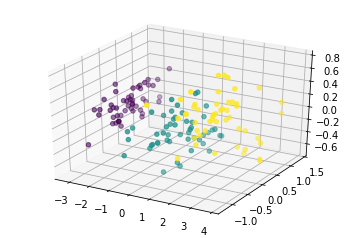

In [338]:
X=A_tf[0]
Y=A_tf[1]
Z=A_tf[2]

ax = plt.axes(projection='3d')
ax.scatter3D(A_tf[0], A_tf[1], A_tf[2], c=A_tf[3], cmap=None)
plt.show()